# Multiple Regression_using day_dataset

In [42]:
import numpy as np                            
import pandas as pd

In [43]:
data=pd.read_csv('day.csv')      # read dataset
data.head()   

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
data.info()                 # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data['day']=pd.to_datetime(data['dteday']).dt.day   
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [5]:
data=data.drop(['instant','dteday'],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [6]:
import matplotlib.pyplot as plt              # Data visualization
import seaborn as sn

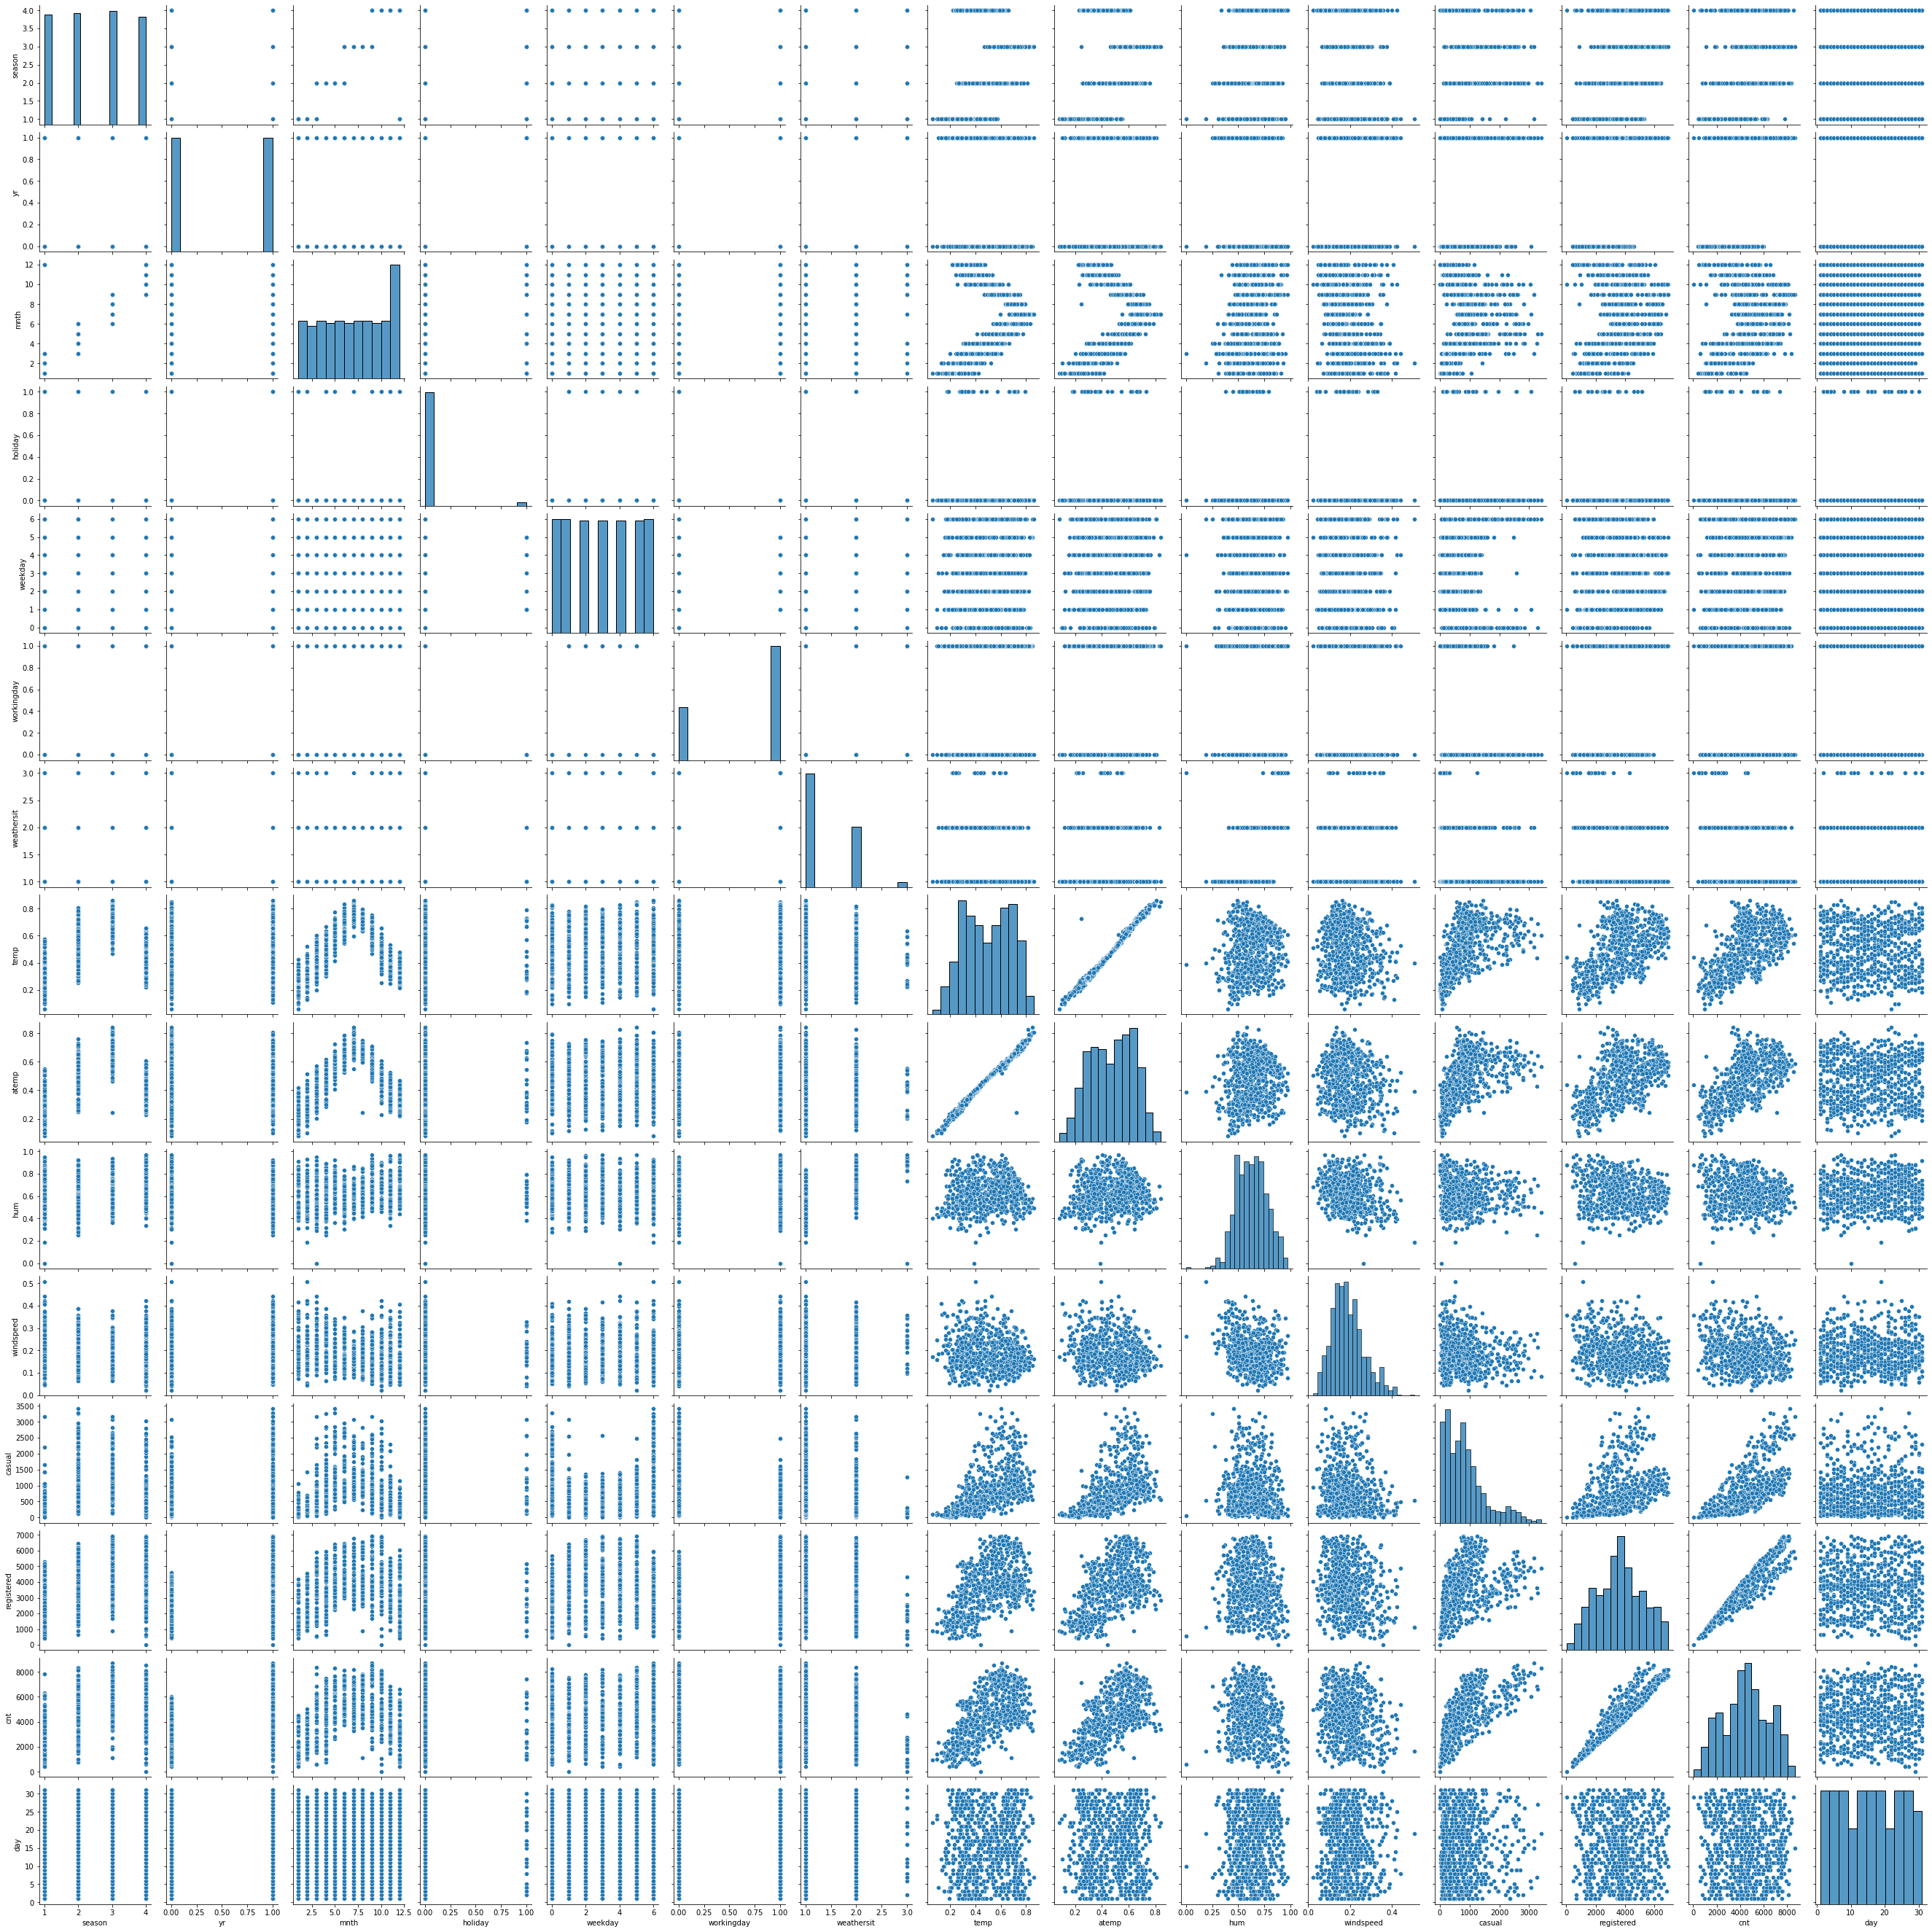

In [7]:
sn.pairplot(data)

In [8]:
data.describe()                      # Descriptive Statistics

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [9]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [10]:
count_col=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day']

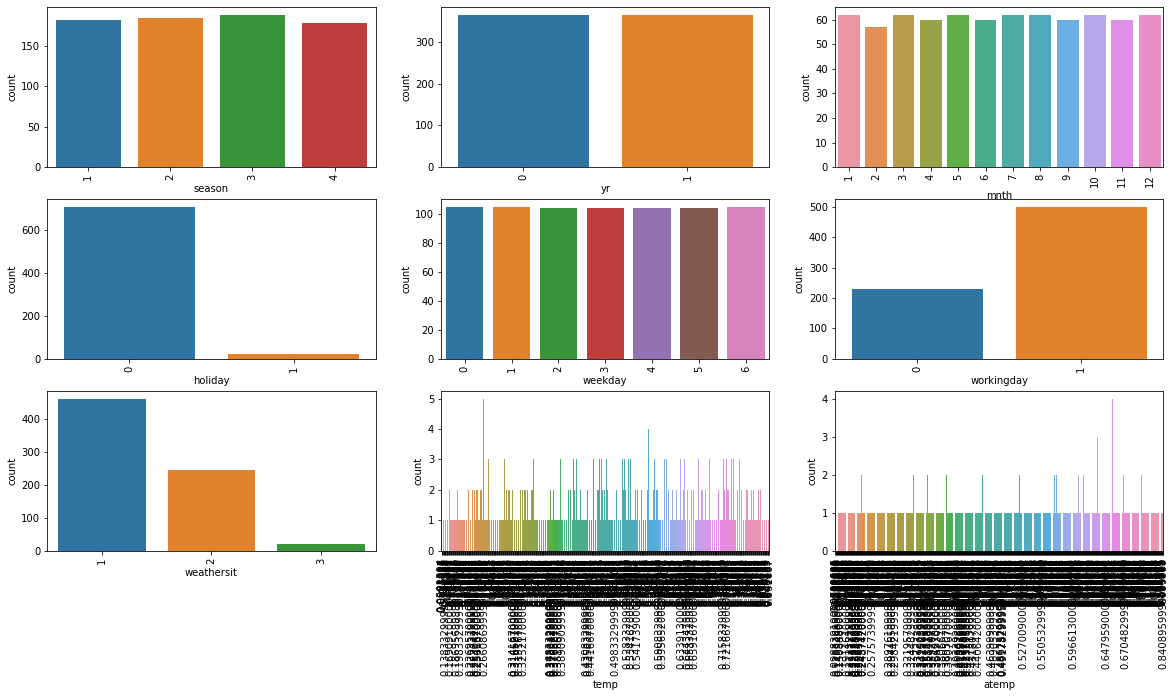

In [11]:
import warnings                                  # count plot
warnings.filterwarnings('ignore')
fig , ax=plt.subplots(3,3, figsize=(20,10))
for var,subplot in zip (count_col,ax.flatten()):
    sn.countplot(data[var],ax=subplot)
    for label in subplot.get_xticklabels():
         label.set_rotation(90)

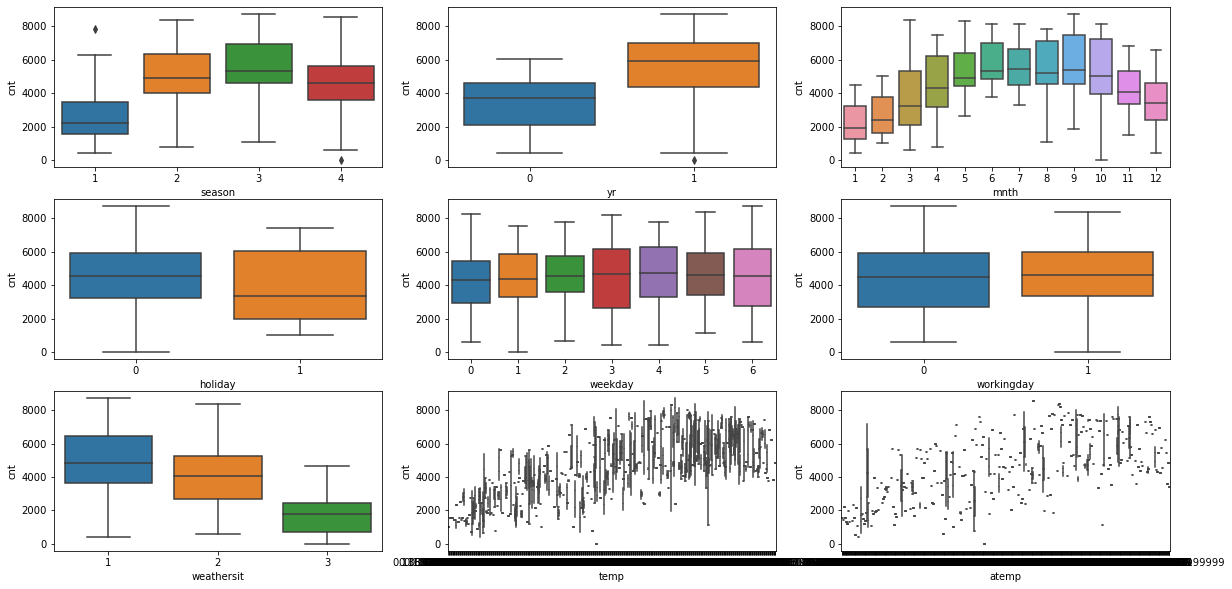

In [16]:
fig , ax=plt.subplots(3,3, figsize=(20,10))
for var,subplot in zip (count_col, ax.flatten()):    # boxplot
    sn.boxplot(x=var,y='cnt',data=data,ax=subplot)

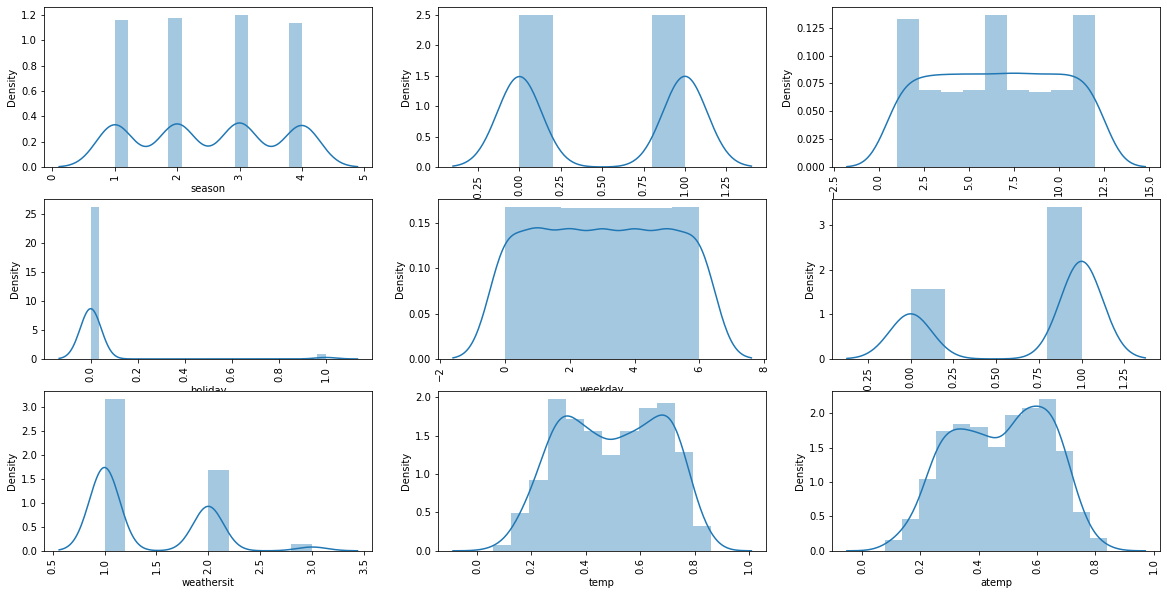

In [17]:
fig , ax=plt.subplots(3,3, figsize=(20,10))
for var,subplot in zip (count_col, ax.flatten()):
    sn.distplot(data[var],ax=subplot)                  #Distribution plot
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

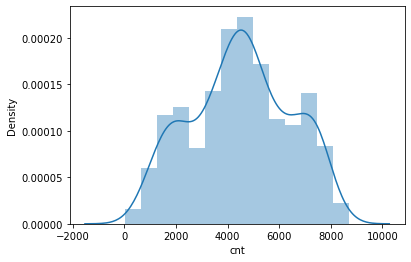

In [19]:
sn.distplot(data['cnt'])

<AxesSubplot:xlabel='cnt'>

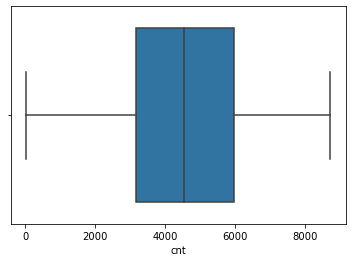

In [20]:
sn.boxplot(data['cnt'])

In [21]:
import statsmodels.api as sm 

In [22]:
x=data.drop(['cnt'],axis=1)
y=data['cnt']

In [23]:
x=sm.add_constant(x)

In [24]:
model=sm.OLS(y,x)                  # fitting model using ols method
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.644e+30
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:49:52   Log-Likelihood:                 18068.
No. Observations:                 731   AIC:                        -3.611e+04
Df Residuals:                     716   BIC:                        -3.604e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.798e-12   1.31e-12      4.431      0.000    3.23e-12    8.37e-12
season     -3.329e-12   3.04e-13    -10.947      0.000   -3.93e-12   -2.73e-12
yr         -1.222e-12   5.53e-13     -2.209      0.027   -2.31e-12   -1.36e-13
mnth        1.337e-13   8.85e-14      1.510      0.132   -4.02e-14    3.07e-13
holiday    -9.663e-13   1.05e-12     -0.924      0.356   -3.02e-12    1.09e-12
weekday    -1.599e-13   8.53e-14     -1.875      0.061   -3.27e-13    7.55e-15
workingday -5.684e-14   6.32e-13     -0.090      0.928    -1.3e-12    1.18e-12
weathersit  1.279e-12   4.25e-13      3.008      0.003    4.44e-13    2.11e-12
temp       -3.638e-12   7.28e-12     -0.500      0.617   -1.79e-11    1.06e-11
atemp       9.095e-13   8.24e-12      0.110      0.912   -1.53e-11    1.71e-11
hum        -1.734e-12   1.64e-12     -1.058      0.290   -4.95e-12    1.48e-12
windspeed  -1.137e-12   2.41e-12     -0.472      0.637   -5.86e-12    3.59e-12
casual         1.0000   4.56e-16   2.19e+15      0.000       1.000       1.000
registered     1.0000   2.62e-16   3.81e+15      0.000       1.000       1.000
day         4.685e-14   1.91e-14      2.454      0.014    9.36e-15    8.43e-14
==============================================================================
Omnibus:                      336.391   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.756
Skew:                          -0.227   Prob(JB):                     1.16e-10
Kurtosis:                       1.862   Cond. No.                     2.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

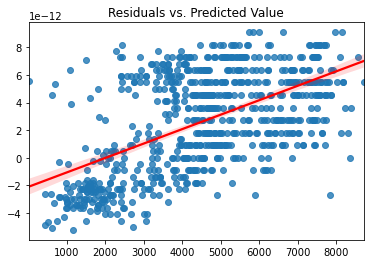

In [25]:
fitted_val=model.predict()
resids = model.resid                            # Residuals vs. Predicted Value

sn.regplot(x=fitted_val, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

In [26]:
from scipy import stats

<AxesSubplot:ylabel='Density'>

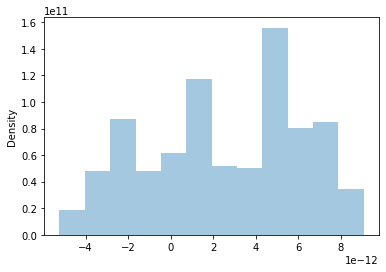

In [27]:
sn.distplot(resids)

((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

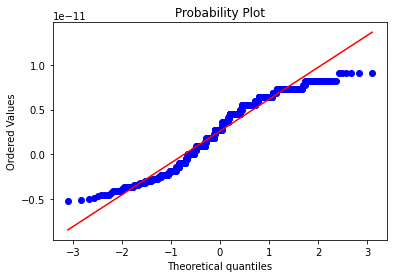

In [28]:
stats.probplot(resids, plot=sn.mpl.pyplot)

In [30]:
resids_standardized = model.get_influence().resid_studentized_internal

<AxesSubplot:>

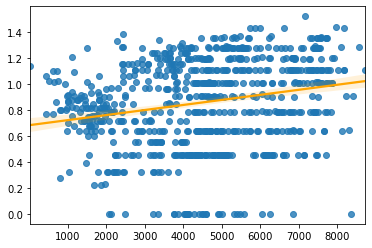

In [31]:
sn.regplot(x=fitted_val, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif1= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])


,0
season,4.105079
yr,2.756825
mnth,3.360556
holiday,1.098406
weekday,1.051474
workingday,3.114792
weathersit,1.931577
temp,63.818818
atemp,64.914059
hum,1.959417


In [34]:
x2=x.drop(['yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','day'],axis=1)
x1=sm.add_constant(x2)

In [35]:
model2=sm.OLS(y,x1)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.280e+32
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:50:31   Log-Likelihood:                 18445.
No. Observations:                 731   AIC:                        -3.688e+04
Df Residuals:                     727   BIC:                        -3.686e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.217e-13   2.89e-13     -2.152      0.032   -1.19e-12   -5.46e-14
season       2.22e-12   9.78e-14     22.701      0.000    2.03e-12    2.41e-12
casual         1.0000   1.57e-16   6.37e+15      0.000       1.000       1.000
registered     1.0000   7.41e-17   1.35e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       23.092   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.459
Skew:                          -0.326   Prob(JB):                     5.95e-05
Kurtosis:                       2.538   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

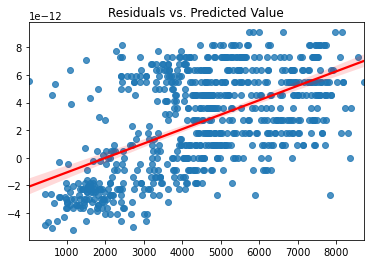

In [36]:
fitted_val=model.predict()
resids = model.resid

sn.regplot(x=fitted_val, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

<AxesSubplot:ylabel='Density'>

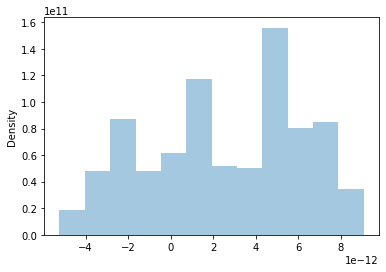

In [37]:
sn.distplot(resids)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif1= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
pd.DataFrame(vif1[1:],index=x1.columns[1:])


,0
season,1.207918
casual,1.189042
registered,1.368230
